<h1>INTRODUCCION A LAS REDES NEURONALES ARTIFICIALES (ANN) Y PERCEPTRON MULTICAPA (MLP) </H1>
<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRmG-myUULUM1PvulLReDUM72u8hY9oIjpsIR_Y6X3DQJIueJnZ&usqp=CAU">

Los ANN están en el núcleo de Deep Learning. Son versátiles, potentes y escalables, lo que los hace ideales para abordar tareas de Aprendizaje automático grandes y muy complejas, como clasificar miles de millones de imágenes (por ejemplo, Google Images), potenciar servicios de reconocimiento de voz (por ejemplo, Siri de Apple), recomendar los mejores videos para ver a cientos de millones de usuarios todos los días (por ejemplo, YouTube), o aprender a vencer al campeón del mundo en el juego de Go al examinar millones de juegos pasados y luego jugar contra sí mismo (AlphaMo de DeepMind).
En este capítulo, introduciremos redes neuronales artificiales, comenzando con un recorrido rápido por las primeras arquitecturas de ANN. Luego, presentaremos Perceptrones de múltiples capas (MLP) e implementaremos uno utilizando TensorFlow para abordar el problema de clasificación de dígitos MNIST 

<h3>El Perceptron</h3>
<img src="https://images.deepai.org/glossary-terms/perceptron-6168423.jpg">

El Perceptron es una de las arquitecturas de ANN más simples, inventada en 1957 por Frank Rosenblatt. Se basa en una neurona artificial ligeramente diferente llamada unidad de umbral lineal (LTU): las entradas y la salida ahora son números (en lugar de valores binarios de activación / desactivación) y cada conexión de entrada está asociada con un peso. La LTU calcula una suma ponderada de sus entradas <br>
(z = w1 x1 + w2 x2 + ⋯ + wn xn = wT · x),<br>
luego aplica una función escalonada a esa suma y genera el resultado: hw (x) = paso (z) = paso (wT · x). 

La función de paso más común utilizada en Perceptrons es la función de paso de Heaviside. A veces se usa la función de signo en su lugar.

<img src="https://circuitoselectricosupb.files.wordpress.com/2012/11/funcion-paso.jpg">

<img src="https://3.bp.blogspot.com/-N3I1wvPtg2U/WRSkKUOXl_I/AAAAAAAAal8/aUqffh8Ivz8NS5lkR2rDkZXWe4Kxdz1gwCLcB/s1600/Funci%25C3%25B3n_Signo.png">

Se puede usar una sola LTU para la clasificación binaria lineal simple. Calcula una combinación lineal de las entradas y, si el resultado supera un umbral, genera la clase positiva o, si no, la clase negativa (como un clasificador de Regresión logística o un SVM lineal). Por ejemplo, podría usar un solo LTU para clasificar las flores del iris según la longitud y el ancho del pétalo (también se agrega una característica de sesgo adicional x0 = 1, como hicimos en los capítulos anteriores). Entrenar un LTU significa encontrar los valores correctos para w0, w1 y w2 (el algoritmo de entrenamiento se discute en breve).
Un Perceptron está compuesto simplemente de una sola capa de LTU, con cada neurona conectada a todas las entradas. Estas conexiones a menudo se representan mediante el paso de neuronas especiales llamadas neuronas de entrada: simplemente emiten la entrada que reciben.

Además, generalmente se agrega una característica de sesgo adicional (x0 = 1). Esta característica de sesgo suele representarse mediante un tipo especial de neurona llamada neurona de sesgo, que solo genera 1 todo el tiempo.


<img src="http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1523361626/linear_vs_logistic_regression_h8voek.jpg" width="700"/>

In [39]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline
iris = load_iris()
xr = iris.data[:, (2, 3)]
yr = (iris.target == 0).astype(np.int).reshape([-1,1])
print(xr.shape)
print(yr.shape)
print(xr)
print(yr)

(150, 2)
(150, 1)
[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [1.7 0.4]
 [1.4 0.3]
 [1.5 0.2]
 [1.4 0.2]
 [1.5 0.1]
 [1.5 0.2]
 [1.6 0.2]
 [1.4 0.1]
 [1.1 0.1]
 [1.2 0.2]
 [1.5 0.4]
 [1.3 0.4]
 [1.4 0.3]
 [1.7 0.3]
 [1.5 0.3]
 [1.7 0.2]
 [1.5 0.4]
 [1.  0.2]
 [1.7 0.5]
 [1.9 0.2]
 [1.6 0.2]
 [1.6 0.4]
 [1.5 0.2]
 [1.4 0.2]
 [1.6 0.2]
 [1.6 0.2]
 [1.5 0.4]
 [1.5 0.1]
 [1.4 0.2]
 [1.5 0.2]
 [1.2 0.2]
 [1.3 0.2]
 [1.4 0.1]
 [1.3 0.2]
 [1.5 0.2]
 [1.3 0.3]
 [1.3 0.3]
 [1.3 0.2]
 [1.6 0.6]
 [1.9 0.4]
 [1.4 0.3]
 [1.6 0.2]
 [1.4 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [4.7 1.4]
 [4.5 1.5]
 [4.9 1.5]
 [4.  1.3]
 [4.6 1.5]
 [4.5 1.3]
 [4.7 1.6]
 [3.3 1. ]
 [4.6 1.3]
 [3.9 1.4]
 [3.5 1. ]
 [4.2 1.5]
 [4.  1. ]
 [4.7 1.4]
 [3.6 1.3]
 [4.4 1.4]
 [4.5 1.5]
 [4.1 1. ]
 [4.5 1.5]
 [3.9 1.1]
 [4.8 1.8]
 [4.  1.3]
 [4.9 1.5]
 [4.7 1.2]
 [4.3 1.3]
 [4.4 1.4]
 [4.8 1.4]
 [5.  1.7]
 [4.5 1.5]
 [3.5 1. ]
 [3.8 1.1]
 [3.7 1. ]
 [3.9 1.2]
 [5.1 1.6]
 [4.5 1.5]
 [4.5 1.6]
 [4.7 1.5]
 [4.4 1.3]
 [4.1 1.3]
 [4

In [31]:
tf.reset_default_graph()

X = tf.placeholder(shape=[None,2], dtype=tf.float32)
y = tf.placeholder(shape=[None,1], dtype=tf.float32)

W = tf.Variable(tf.random_uniform([2, 1]))
b = tf.Variable(tf.random_uniform([1, 1]))
z_pred = tf.matmul(X, W)+b

Funcion sigmoid para regresion logistica

<img src="https://analyticsindiamag.com/wp-content/uploads/2018/01/sigmoid-equation.png" />

In [32]:
y_pred = tf.sigmoid(z_pred) #Acotado entre 0 y 1

Funcion de costo: entropia cruzada

<img src="https://cdn-images-1.medium.com/max/1600/1*gNuP7PN6sC42vAYWvoAMMA.png" width="500"/>

In [33]:
xentropy = -y*tf.log(y_pred)-(1-y)*tf.log(1-y_pred)
loss = tf.reduce_mean(xentropy)
learning_rate = 0.1
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss) 

In [34]:
n_epochs = 600
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(n_epochs):
        _,cur_xentropy=sess.run([training_op,loss],feed_dict={X:xr,y:yr})
        if epoch % 100 == 0: print("Epoca", epoch, "Cross Entropy =", cur_xentropy)
    
    valW = W.eval()
    valb = b.eval()
    print(valW)
    print(valb)

Epoca 0 Cross Entropy = 2.3594487
Epoca 100 Cross Entropy = 0.099438995
Epoca 200 Cross Entropy = 0.04273257
Epoca 300 Cross Entropy = 0.025497882
Epoca 400 Cross Entropy = 0.017518569
Epoca 500 Cross Entropy = 0.0130188465
[[-1.8720123]
 [-4.380847 ]]
[[7.9730024]]


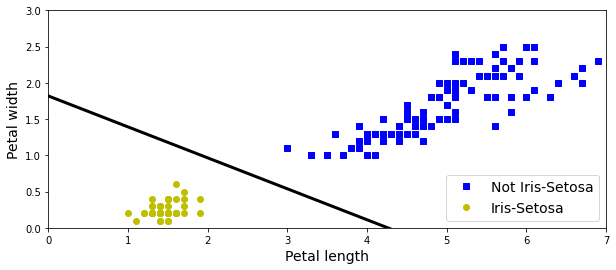

In [40]:
a = -valW[0] / valW[1]
b = -valb[0] / valW[1]

axes = [0, 7, 0, 3]

plt.figure(figsize=(10, 4))
plt.plot(xr[yr.reshape(-1)==0,0], xr[yr.reshape(-1)==0,1], "bs", label="Not Iris-Setosa")
plt.plot(xr[yr.reshape(-1)==1,0], xr[yr.reshape(-1)==1,1], "yo", label="Iris-Setosa")
plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)

plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

plt.show()

Entonces, ¿cómo se entrena un Perceptrón? <br>
El algoritmo de entrenamiento Perceptron propuesto por Frank Rosenblatt se inspiró en gran medida en la regla de Hebb. En su libro The Organization of Behavior, publicado en 1949, Donald Hebb sugirió que cuando se utiliza una neurona biológica, el nombre Perceptron se usa a veces para referirse a una pequeña red con una sola unidad de manejo. A menudo se desencadena otra neurona, la conexión entre estas dos neuronas se hace más fuerte. Esta idea fue resumida más tarde por Siegrid Löwel en esta frase pegadiza:<br>
“Las células que se disparan juntas, se conectan entre sí”. Esta regla más tarde se conoció como la regla de Hebb (o aprendizaje Hebbian); es decir, el peso de conexión entre dos neuronas aumenta cada vez que tienen la misma salida. Los perceptrones se entrenan usando una variante de esta regla que toma en cuenta el error cometido por la red; no refuerza las conexiones que conducen a una salida incorrecta. Más específicamente, el Perceptron se alimenta una instancia de entrenamiento a la vez, y para cada instancia hace sus predicciones.
Para cada neurona de salida que produjo una predicción incorrecta, refuerza los pesos de conexión de las entradas que habrían contribuido a la predicción correcta.

<img src="https://res.cloudinary.com/practicaldev/image/fetch/s--IGMiNYwp--/c_limit%2Cf_auto%2Cfl_progressive%2Cq_auto%2Cw_880/https://slideplayer.com/slide/5098348/16/images/13/Perceptron%2BTraining%2BRule.jpg">

• wi, j es el peso de conexión entre la neurona de entrada ith y la neurona de salida jth.<br>
• xi es el valor de entrada i de la instancia de entrenamiento actual.<br>
• yj es la salida de la neurona de salida jth para la instancia de entrenamiento actual.<br>
• yj es la salida objetivo de la neurona de salida jth para la instancia de entrenamiento actual.<br>
• η es la tasa de aprendizaje.<br>

El límite de decisión de cada neurona de salida es lineal, por lo que los Perceptrones son incapaces de aprender patrones complejos (como los clasificadores de Regresión logística). Sin embargo, si las instancias de entrenamiento son linealmente separables, Rosenblatt demostró que este algoritmo convergería en una solución.7 Esto se conoce como el teorema de convergencia de Perceptron. Scikit-Learn proporciona una clase de Perceptron que implementa una única red de LTU. Se puede usar prácticamente como se esperaría, por ejemplo, en el conjunto de datos del iris (introducido en el Capítulo 4):

In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
iris = load_iris()
X = iris.data[:, (2, 3)] # petal length, petal width
y = (iris.target == 0).astype(np.int) # Iris Setosa?
per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)
y_pred = per_clf.predict([[2, 0.5]])

Es posible que haya reconocido que el algoritmo de aprendizaje Perceptron se parece mucho a la pendiente de gradiente estocástica. De hecho, la clase Perceptron de Scikit-Learn es equivalente a usar un clasificador SGDC con los siguientes hiperparámetros: pérdida = "perceptrón", learning_rate = "constante", eta0 = 1 (la tasa de aprendizaje) y penalización = Ninguna (sin regularización).

Tenga en cuenta que, a diferencia de los clasificadores de Regresión logística, los Perceptrones no generan una probabilidad de clase; más bien, simplemente hacen predicciones basadas en un umbral difícil. Esta es una de las buenas razones para preferir la regresión logística sobre los perceptrones. En su monografía de 1969 titulada Perceptrons, Marvin Minsky y Seymour Papert destacaron varias debilidades serias de los Perceptrons, en particular el hecho de que son incapaces de resolver algunos problemas triviales (por ejemplo, el problema de clasificación Exclusivo OR (XOR); vea el lado izquierdo de la figura 10-6). Por supuesto, esto también se aplica a cualquier otro modelo de clasificación lineal (como los clasificadores de Regresión logística), pero los investigadores esperaban mucho más de los Perceptrones, y su decepción fue grande: como resultado, muchos investigadores abandonaron el conexionismo (es decir, el estudio de redes neuronales) a favor de problemas de nivel superior, como la lógica, la resolución de problemas y la búsqueda.
Sin embargo, resulta que algunas de las limitaciones de los Perceptrons pueden eliminarse apilando múltiples Perceptrons. La ANN resultante se llama Perceptrón de múltiples capas (MLP). En particular, un MLP puede resolver el problema XOR, como puede verificar al calcular la salida del MLP representado a la derecha de la Figura 10-6, para cada combinación de entradas: con entradas (0, 0) o (1, 1 ) la red genera 0, y con las entradas (0, 1) o (1, 0) genera 1.

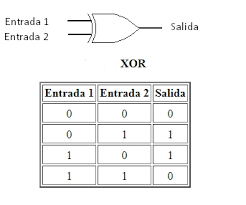

<h3>Perceptrón multicapa (MLP) y Backpropagation (MUY IMPORTANTE)</h3>

Un MLP se compone de una capa de entrada (pasante), una o más capas de LTU, llamadas capas ocultas, y una capa final de LTU llamada capa de salida. Cada capa, excepto la capa de salida, incluye una neurona de polarización y está completamente conectada a la siguiente capa. Cuando una ANN tiene dos o más capas ocultas, se denomina red neuronal profunda (DNN).

<img src="https://upload.wikimedia.org/wikipedia/commons/6/64/RedNeuronalArtificial.png">

<img src="https://www.linkedin.com/media-proxy/ext?w=397&h=375&hash=NAlhTWBMHhR4IaSC%2F69eu32BVoA%3D&ora=1%2CaFBCTXdkRmpGL2lvQUFBPQ%2CxAVta5g-0R69hAxUwxAt4ayOuFuz7VVEUIvIES7yBHi1v5XcPya9OtibIff89gNHIXBCj1VhO7buEXS4Tc2hctTyLMEszsuhfcy1fwIUJAwzl2pK_MUpNhdpu5GzF-r8LSBLxvtXfySCIbLWZlM8NSw6_OuMf8nSOVo">

Durante muchos años, los investigadores lucharon por encontrar una manera de entrenar a las MLP, sin éxito.
Pero en 1986, D. E. Rumelhart et al. publicó un artículo innovador que presenta el algoritmo de entrenamiento de la propagación hacia atrás (backpropagation). Hoy lo describiríamos como Pendiente descendente (gradiente descendente) utilizando el modo automático en modo inverso (autodiff) (la Pendiente descendente se introdujo en el Capítulo 4, y la Autodifusión se analizó en el Capítulo 9).
Para cada instancia de entrenamiento, el algoritmo lo alimenta a la red y calcula la salida de cada neurona en cada capa consecutiva (este es el paso hacia adelante, al igual que cuando se hacen predicciones). Luego mide el error de salida de la red (es decir, la diferencia entre la salida deseada y la salida real de la red) y calcula cuánto contribuyó cada neurona en la última capa oculta al error de cada neurona de salida. Luego procede a medir la cantidad de estas contribuciones de error provenientes de cada neurona en la capa oculta anterior, y así sucesivamente hasta que el algoritmo alcance la capa de entrada. Esta pasada inversa mide de manera eficiente el gradiente de error en todos los pesos de conexión en la red propagando el gradiente de error hacia atrás en la red (de ahí el nombre del algoritmo). Si consulta los algoritmo de modo automático de modo inverso en el Apéndice D, encontrará que los pasos de avance y retroceso de la propagación hacia atrás simplemente realizan el modo automático de modo inverso. El último paso del algoritmo de propagación hacia atrás es un paso de descenso de gradiente en todos los pesos de conexión en la red, utilizando los gradientes de error medidos anteriormente.

Hagamos esto aún más corto: para cada instancia de entrenamiento, el algoritmo de propagación hacia atrás primero hace una predicción (pase hacia adelante), mide el error, luego pasa a través de cada capa en reversa para medir la contribución de error de cada conexión (paso en reversa), y finalmente, ajusta ligeramente los pesos de conexión para reducir el error (paso de descenso de gradiente).<br>
Para que este algoritmo funcione correctamente, los autores hicieron un cambio clave en la arquitectura de MLP: reemplazaron la función de pasos con la función logística, σ (z) = 1 / (1 + exp (–z)). Esto fue esencial porque la función de escalón solo contiene segmentos planos, por lo que no hay un gradiente con el que trabajar (la pendiente descendente no se puede mover sobre una superficie plana), mientras que la función logística tiene un derivado distinto de cero bien definido en todas partes.<br>
permitiendo que Gradient Descent progrese en cada paso. El algoritmo de propagación hacia atrás puede usarse con otras funciones de activación, en lugar de la función logística. Otras dos funciones de activación populares son: La función tangente hiperbólica tanh (z) = 2σ (2z) - 1<br>
Al igual que la función logística, tiene forma de S, continua y diferenciable, pero su valor de salida varía de –1 a 1 (en lugar de 0 a 1 en el caso de la función logística), lo que tiende a aumentar la salida de cada capa. menos normalizado (es decir, centrado alrededor de 0) al comienzo del entrenamiento. Esto a menudo ayuda a acelerar la convergencia.<br>
La función ReLU (introducida en el Capítulo 9) ReLU (z) = max (0, z). Es continuo, pero desafortunadamente no es diferenciable en z = 0 (la pendiente cambia bruscamente, lo que puede hacer que el Descenso Gradiente rebote). Sin embargo, en la práctica funciona muy bien y tiene la ventaja de ser rápido de calcular. Lo más importante es que el hecho de que no tenga un valor de salida máximo también ayuda a reducir algunos problemas durante el descenso gradual 

<h3>Algunas funciones de activacion</h3>

<img src="https://ai-master.gitbooks.io/logistic-regression/assets/sigmoid_function.png">

<img src="https://mathworld.wolfram.com/images/interactive/TanhReal.gif">

Relu (la mas recomendada)

<img src="https://miro.medium.com/max/1000/1*3JUMOqugWKB2SDra6x6v0A.png">

A menudo se usa un MLP para la clasificación, con cada salida correspondiente a una clase binaria diferente (por ejemplo, correo no deseado / correo no deseado, urgente / no urgente, etc.). Cuando las clases son exclusivas (por ejemplo, las clases 0 a 9 para la clasificación de imágenes de dígitos), la capa de salida generalmente se modifica al reemplazar las funciones de activación individuales por una función de softmax compartida. La salida de cada neurona corresponde a la probabilidad estimada de la clase correspondiente. Tenga en cuenta que la señal fluye solo en una dirección (desde las entradas a las salidas), por lo que esta arquitectura es un ejemplo de una <b>red neuronal de avance (FNN).

<h3>Modelo de Red Neuronal para la clasificacion de clases exclusivas (FNN and MLP) (MUY IMPORTANTE)</H3>

<img src="https://www.oreilly.com/library/view/neural-networks-and/9781492037354/assets/mlst_1009.png">

<h3>Capacitación de un MLP con la API de alto nivel de TensorFlow</h3>

La forma más sencilla de entrenar un MLP con TensorFlow es usar la API de alto nivel TF.Learn, que es bastante similar a la API de Scikit-Learn. La clase DNNClassifier hace que sea trivial entrenar una red neuronal profunda con cualquier número de capas ocultas y una capa de salida de softmax para generar probabilidades de clase estimadas. Por ejemplo, el siguiente código entrena un DNN para la clasificación con dos capas ocultas (una con 300 neuronas y la otra con 100 neuronas) y una capa de salida de softmax con 10 neuronas:

In [10]:
import tensorflow as tf
feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(X_train)
dnn_clf = tf.contrib.learn.DNNClassifier(hidden_units=[300, 100], n_classes=10,feature_columns=feature_columns)
dnn_clf.fit(x=X_train, y=y_train, batch_size=50, steps=40000)

NameError: name 'X_train' is not defined

Si ejecuta este código en el conjunto de datos MNIST (después de escalarlo, por ejemplo, al utilizar el StandardScaler de Scikit-Learn), ¡en realidad puede obtener un modelo que logre una precisión superior al 98,1% en el conjunto de pruebas! Eso es mejor que el mejor modelo que entrenamos en el Capítulo 3:

In [7]:
from sklearn.metrics import accuracy_score
y_pred = list(dnn_clf.predict(X_test))
accuracy_score(y_test, y_pred)

NameError: name 'dnn_clf' is not defined

La biblioteca TF.Learn también proporciona algunas funciones de conveniencia para evaluar modelos:

In [ ]:
dnn_clf.evaluate(X_test, y_test)

Bajo el capó, la clase DNNClassifier crea todas las capas de neuronas, según la función de activación ReLU (podemos cambiar esto configurando el hiperparámetro de activación_fn).
La capa de salida se basa en la función softmax, y la función de costo es la entropía cruzada (introducida en el Capítulo 4).
La API de TF.Learn es todavía bastante nueva, por lo que algunos de los nombres y funciones utilizados en estos ejemplos pueden evolucionar un poco para cuando lea este libro. Sin embargo, las ideas generales no deben cambiar.

<h3>Entrenando un DNN usando el TensorFlow plano</h3>

Si desea más control sobre la arquitectura de la red, puede preferir usar la API de Python de nivel inferior de TensorFlow (presentada en el Capítulo 9). En esta sección, construiremos el mismo modelo que antes de usar esta API e implementaremos Minibatch Gradient Descent para entrenarlo en el conjunto de datos MNIST. El primer paso es la fase de construcción, construyendo el gráfico TensorFlow. El segundo paso es la fase de ejecución, donde realmente ejecutas el gráfico para entrenar el modelo.

In [ ]:
Fase de construcción

Empecemos. Primero necesitamos importar la biblioteca tensorflow. Luego debemos especificar el número de entradas y salidas, y establecer el número de neuronas ocultas en cada capa:

In [13]:
import tensorflow as tf
n_inputs = 28*28 #MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

A continuación, al igual que lo hizo en el Capítulo 9, puede utilizar los nodos de marcador de posición para representar los datos y objetivos de la capacitación. La forma de X está solo parcialmente definida. Sabemos que será un tensor 2D (es decir, una matriz), con instancias a lo largo de la primera dimensión y características a lo largo de la segunda dimensión, y sabemos que la cantidad de características será de 28 x 28 (una característica por píxel) , pero aún no sabemos cuántas instancias contendrá cada lote de entrenamiento. Así que la forma de X es (Ninguna, n_inputs). De manera similar, sabemos que y será un tensor 1D con una entrada por instancia, pero nuevamente no sabemos el tamaño del lote de entrenamiento en este punto, por lo que la forma es (Ninguna).

In [22]:
X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.float32, shape=(None), name="y")

Ahora vamos a crear la red neuronal real. El marcador de posición X actuará como la capa de entrada; durante la fase de ejecución, se reemplazará con un lote de entrenamiento a la vez (tenga en cuenta que todas las instancias en un lote de entrenamiento serán procesadas simultáneamente por la red neuronal). Ahora necesitas crear las dos capas ocultas y la capa de salida.
Las dos capas ocultas son casi idénticas: solo se diferencian por las entradas a las que están conectadas y por el número de neuronas que contienen. La capa de salida también es muy similar, pero utiliza una función de activación de softmax en lugar de una función de activación de ReLU. Así que vamos a crear una función neuron_layer () que usaremos para crear una capa a la vez. Necesitará parámetros para especificar las entradas, el número de neuronas, la función de activación y el nombre de la capa:

In [16]:
def neuron_layer(X, n_neurons, name, activation=None):
    with tf.name_scope(name):
        n_inputs = int(np.shape(X)[1])
        stddev = 2 / np.sqrt(n_inputs)
        init = tf.truncated_normal((n_inputs, n_neurons), stddev=stddev)
        W = tf.Variable(init, name="weights")
        b = tf.Variable(tf.zeros([n_neurons]), name="biases")
        z = tf.matmul(X, W) + b
        if activation=="relu":
            return tf.nn.relu(z)
        else:
            return z

1. Primero, creamos un ámbito de nombre utilizando el nombre de la capa: contendrá todos los nodos de cálculo para esta capa de neurona. Esto es opcional, pero el gráfico se verá mucho mejor en TensorBoard si sus nodos están bien organizados.
2. A continuación, obtenemos el número de entradas buscando la forma de la matriz de entrada y obteniendo el tamaño de la segunda dimensión (la primera dimensión es para instancias).
3. Las siguientes tres líneas crean una variable W que contendrá la matriz de pesos. Será un tensor 2D que contiene todos los pesos de conexión entre cada entrada y cada neurona; Por lo tanto, su forma será (n_inputs, n_neurons). Se inicializará aleatoriamente, utilizando una distribución truncada 10 normal (gaussiana) con una desviación estándar de 2 / ninputs. El uso de esta desviación estándar específica ayuda a que el algoritmo converja mucho más rápido (lo discutiremos con mayor detalle en el Capítulo 11; es uno de esos pequeños ajustes en las redes neuronales que han tenido un impacto tremendo en su eficiencia).
Es importante inicializar los pesos de conexión aleatoriamente para todas las capas ocultas para evitar cualquier simetría que el algoritmo de descenso de gradiente no pueda romper.
4. La siguiente línea crea una variable b para los sesgos, inicializada a 0 (no hay problema de simetría en este caso), con un parámetro de sesgo por neurona.
5. Luego creamos un subgrafo para calcular z = X · W + b. Esta implementación vectorizada computará de manera eficiente las sumas ponderadas de las entradas más el término de sesgo para todas y cada una de las neuronas en la capa, para todas las instancias en el lote en una sola toma.
6. Finalmente, si el parámetro de activación se configura en "relu", el código devuelve relu (z) (es decir, max (0, z)), o simplemente devuelve z.

Bien, ahora tienes una buena función para crear una capa neuronal. ¡Vamos a usarlo para crear la red neuronal profunda! La primera capa oculta toma X como su entrada. El segundo toma la salida de la primera capa oculta como su entrada. Y, finalmente, la capa de salida toma la salida de la segunda capa oculta como su entrada.

In [17]:
with tf.name_scope("dnn"):
    hidden1 = neuron_layer(X, n_hidden1, "hidden1", activation="relu")
    hidden2 = neuron_layer(hidden1, n_hidden2, "hidden2", activation="relu")
    logits = neuron_layer(hidden2, n_outputs, "outputs")

TypeError: Input 'b' of 'MatMul' Op has type float32 that does not match type float64 of argument 'a'.

Tenga en cuenta que una vez más usamos un ámbito de nombre para mayor claridad. También tenga en cuenta que logits es la salida de la red neuronal antes de pasar por la función de activación de softmax: por razones de optimización, manejaremos el cálculo de softmax más adelante.

Como es de esperar, TensorFlow viene con muchas funciones prácticas para crear capas de red neuronal estándar, por lo que a menudo no hay necesidad de definir su propia función neuron_layer () como acabamos de hacer. Por ejemplo, la función totalmente_conectada () de TensorFlow crea una capa completamente conectada, donde todas las entradas están conectadas a todas las neuronas en la capa. Se encarga de crear las variables de ponderaciones y sesgos, con la estrategia de inicialización adecuada, y utiliza la función de activación ReLU de forma predeterminada (podemos cambiar esto utilizando el argumento activation_fn). Como veremos en el Capítulo 11, también admite parámetros de regularización y normalización. Modifiquemos el código anterior para usar la función fully_connected () en lugar de nuestra función neuron_layer (). Simplemente importe la función y reemplace la sección de construcción de dnn con el siguiente código: 

In [18]:
from tensorflow.contrib.layers import fully_connected
with tf.name_scope("dnn"):
    hidden1 = fully_connected(X, n_hidden1, scope="hidden1")
    hidden2 = fully_connected(hidden1, n_hidden2, scope="hidden2")
    logits = fully_connected(hidden2, n_outputs, scope="outputs",activation_fn=None)

Instructions for updating:
Please use `layer.__call__` method instead.


El paquete tensorflow.contrib contiene muchas funciones útiles, pero es un lugar para el código experimental que aún no se ha graduado para formar parte de la API principal de TensorFlow. Por lo tanto, la función full_connected () (y cualquier otro código contrib) puede cambiar o moverse en el futuro.
Ahora que tenemos el modelo de red neuronal listo para funcionar, debemos definir la función de costo que usaremos para entrenarlo. Al igual que hicimos para la Regresión de Softmax en el Capítulo 4, usaremos la entropía cruzada. Como comentamos anteriormente, la entropía cruzada penalizará los modelos que estiman una probabilidad baja para la clase objetivo. TensorFlow proporciona varias funciones para calcular la entropía cruzada. Usaremos sparse_softmax_cross_entropy_with_logits (): calcula la entropía cruzada según los "logits" (es decir, la salida de la red antes de pasar por la función de activación de softmax), y espera etiquetas en forma de enteros que van desde 0 hasta el número de clases menos 1 (en nuestro caso, de 0 a 9). Esto nos dará un tensor 1D que contiene la entropía cruzada para cada instancia. Luego podemos usar la función reductor () de TensorFlow para calcular la entropía cruzada media en todas las instancias.

In [19]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

La función sparse_softmax_cross_entropy_with_logits () es equivalente a aplicar la función de activación de softmax y luego calcular la entropía cruzada, pero es más eficiente y cuida adecuadamente los casos de esquina como logits iguales a 0. Por este motivo no aplicamos la activación de softmax funciona antes También hay otra función llamada softmax_cross_entropy_with_logits (), que toma etiquetas en forma de vectores calientes (en lugar de ints desde 0 hasta el número de clases menos 1).

Tenemos el modelo de red neuronal, tenemos la función de costo, y ahora necesitamos definir un GradientDescentOptimizer que modificará los parámetros del modelo para minimizar la función de costo. Nada nuevo; Es como lo hicimos en el Capítulo 9:

In [20]:
learning_rate = 0.01
with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

El último paso importante en la fase de construcción es especificar cómo evaluar el modelo. Simplemente utilizaremos la precisión como nuestra medida de rendimiento. Primero, para cada instancia, determine si la predicción de la red neuronal es correcta verificando si el logit más alto corresponde o no a la clase objetivo. Para esto puedes usar la función in_top_k (). Esto devuelve un tensor 1D lleno de valores booleanos, por lo que necesitamos convertir estos booleanos en flotantes y luego calcular el promedio. Esto nos dará la precisión general de la red.

In [23]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

TypeError: Input 'predictions' of 'InTopKV2' Op has type float64 that does not match expected type of float32.

Y, como es habitual, debemos crear un nodo para inicializar todas las variables, y también crearemos un protector para guardar los parámetros de nuestro modelo entrenado en el disco:

In [ ]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

¡Uf! Con esto concluye la fase de construcción. Esto fue menos de 40 líneas de código, pero fue bastante intenso: creamos marcadores de posición para las entradas y los objetivos, creamos una función para construir una capa de neurona, la usamos para crear el DNN, definimos la función de costo, Creamos un optimizador, y finalmente definimos la medida de rendimiento. Ahora a la fase de ejecución.

In [ ]:
Fase de ejecución

Esta parte es mucho más corta y más simple. Primero, carguemos MNIST. Podríamos usar Scikit-Learn para eso como lo hicimos en los capítulos anteriores, pero TensorFlow ofrece su propio ayudante que obtiene los datos, los escala (entre 0 y 1), los baraja y proporciona una función simple para cargar un mini lote. hora. Así que vamos a usarlo en su lugar: 

In [25]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/")

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [ ]:
Ahora definimos el número de épocas que queremos ejecutar, así como el tamaño de los mini lotes:

In [ ]:
n_epochs = 400
batch_size = 50

In [ ]:
Y ahora podemos entrenar el modelo: 

In [ ]:
with tf.Session() as sess:
init.run()
for epoch in range(n_epochs):
for iteration in range(mnist.train.num_examples // batch_size):
X_batch, y_batch = mnist.train.next_batch(batch_size)
sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
acc_test = accuracy.eval(feed_dict={X: mnist.test.images,
y: mnist.test.labels})
print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)
save_path = saver.save(sess, "./my_model_final.ckpt")

Este código abre una sesión de TensorFlow y ejecuta el nodo de inicio que inicializa todas las variables. Luego ejecuta el ciclo de entrenamiento principal: en cada época, el código se itera a través de varios mini lotes que corresponden al tamaño del conjunto de entrenamiento. Cada mini lote se obtiene a través del método next_batch (), y luego el código simplemente ejecuta la operación de entrenamiento, y le proporciona los datos y objetivos de entrada del mini lote actual. A continuación, al final de cada época, el código evalúa el modelo en el último mini lote y en el conjunto completo de entrenamiento, e imprime el resultado. Finalmente, los parámetros del modelo se guardan en el disco.

Usando la red neuronal
Ahora que la red neuronal está entrenada, puedes usarla para hacer predicciones. Para hacer eso, puede reutilizar la misma fase de construcción, pero cambiar la fase de ejecución de esta manera: 

In [ ]:
with tf.Session() as sess:
saver.restore(sess, "./my_model_final.ckpt")
X_new_scaled = [...] # some new images (scaled from 0 to 1)
Z = logits.eval(feed_dict={X: X_new_scaled})
y_pred = np.argmax(Z, axis=1)

Primero el código carga los parámetros del modelo desde el disco. Luego carga algunas imágenes nuevas que quieres clasificar. Recuerde aplicar la misma función de escala que para los datos de entrenamiento (en este caso, escale de 0 a 1). Luego el código evalúa el nodo logits.

Si quisiera conocer todas las probabilidades estimadas de la clase, tendría que aplicar la función softmax () a los logits, pero si solo quiere predecir una clase, simplemente puede elegir la clase que tenga el valor logit más alto (usando la función argmax () hace el truco).

<h3>Hiperparámetros de red neuronal de ajuste fino</h3>

<img src="https://unipython.com/wp-content/uploads/2018/04/deeplLearning-python3-min-840x430.png">

La flexibilidad de las redes neuronales es también uno de sus principales inconvenientes: hay muchos hiperparámetros para modificar. No solo puede usar cualquier topología de red imaginable (cómo se interconectan las neuronas), sino que incluso en un MLP simple puede cambiar el número de capas, el número de neuronas por capa, el tipo de función de activación que se debe usar en cada capa, el peso Lógica de inicialización, y mucho más. ¿Cómo sabes qué combinación de hiperparámetros es la mejor para tu tarea? Por supuesto, puede usar la búsqueda en cuadrícula con validación cruzada para encontrar los hiperparámetros correctos, como lo hizo en los capítulos anteriores, pero ya que hay muchos parámetros para sintonizar, y desde el entrenamiento de una red neuronal en un gran conjunto de datos lleva mucho tiempo, solo podrá explorar una pequeña parte del espacio del hiperparámetro en un tiempo razonable. Es mucho mejor utilizar la búsqueda aleatoria, como vimos en el Capítulo 2. Otra opción es usar una herramienta como Oscar, que implementa algoritmos más complejos para ayudarlo a encontrar rápidamente un buen conjunto de hiperparámetros.
Es útil tener una idea de qué valores son razonables para cada hiperparámetro, de modo que pueda restringir el espacio de búsqueda. Vamos a empezar con el número de capas ocultas.

<h3>Número de capas ocultas</h3>

Para muchos problemas, puede comenzar con una sola capa oculta y obtendrá resultados razonables. En realidad, se ha demostrado que una MLP con una sola capa oculta puede modelar incluso las funciones más complejas siempre que tenga suficientes neuronas. Durante mucho tiempo, estos hechos convencieron a los investigadores de que no había necesidad de investigar redes neuronales más profundas. Pero pasaron por alto el hecho de que las redes profundas tienen una eficacia de parámetros mucho más alta que las superficiales: <b>pueden modelar funciones complejas utilizando exponencialmente menos neuronas que redes poco profundas, lo que las hace mucho más rápidas para entrenar.</b><br>
Para entender por qué, suponga que se le pide que dibuje un bosque utilizando algún software de dibujo, pero está prohibido copiar / pegar. Tendrías que dibujar cada árbol individualmente, rama por rama, hoja por hoja. Si en cambio podría dibujar una hoja, cópiela / pegue para dibujar una rama, luego copie / pegue esa rama para crear un árbol, y finalmente copie / pegue este árbol para hacer un bosque, terminará en poco tiempo. Los datos del mundo real a menudo se estructuran de forma jerárquica y los DNN aprovechan automáticamente este hecho: las capas ocultas inferiores modelan estructuras de bajo nivel (por ejemplo, segmentos de línea de varias formas y orientaciones), las capas ocultas intermedias combinan estas estructuras de bajo nivel para modelar las estructuras de nivel intermedio (por ejemplo, cuadrados, círculos) y las capas ocultas más altas y la capa de salida combinan estas estructuras intermedias para modelar estructuras de alto nivel (por ejemplo, caras).
Esta arquitectura jerárquica no solo ayuda a los DNN a converger más rápido a una buena solución, sino que también mejora su capacidad para generalizar a nuevos conjuntos de datos.<b> Por ejemplo, si ya ha entrenado a un modelo para reconocer rostros en imágenes y ahora desea entrenar a una nueva red neuronal para reconocer los peinados, entonces puede comenzar el entrenamiento al reutilizar las capas inferiores de la primera red. En lugar de inicializar aleatoriamente los pesos y sesgos de las primeras capas de la nueva red neuronal, puede inicializarlos con el valor de los pesos y sesgos de las capas inferiores de la primera red.<br>
De esta manera, la red no tendrá que aprender desde cero todas las estructuras de bajo nivel que se producen en la mayoría de las imágenes; solo tendrá que aprender las estructuras de nivel superior (por ejemplo, peinados).

En resumen, para muchos problemas, puede comenzar con solo una o dos capas ocultas y funcionará bien (por ejemplo, puede alcanzar fácilmente una precisión superior al 97% en el conjunto de datos MNIST utilizando solo una capa oculta con unos pocos cientos de neuronas, y más 98% de precisión usando dos capas ocultas con la misma cantidad total de neuronas, en aproximadamente la misma cantidad de tiempo de entrenamiento). Para problemas más complejos, puede aumentar gradualmente el número de capas ocultas, hasta que comience a adaptar excesivamente el conjunto de entrenamiento. Las tareas muy complejas, como la clasificación de imágenes grandes o el reconocimiento de voz, generalmente requieren redes con una docena de capas (o incluso cientos, pero no totalmente conectadas, como veremos en el Capítulo 13), y necesitan una gran cantidad de datos de entrenamiento. <b>Sin embargo, rara vez tendrá que capacitar a dichas redes desde cero: es mucho más común reutilizar partes de una red de vanguardia pre-entrenada que realiza una tarea similar.
La capacitación será mucho más rápida y requerirá menos datos.

<h3>Número de neuronas por capa oculta</h3>

Obviamente, el número de neuronas en las capas de entrada y salida está determinado por el tipo de entrada y salida que requiere su tarea. Por ejemplo, la tarea MNIST requiere 28 x 28 = 784 neuronas de entrada y 10 neuronas de salida. <b>En cuanto a las capas ocultas, una práctica común es dimensionarlas para formar un embudo, con cada vez menos neuronas en cada capa; la razón es que muchas características de bajo nivel pueden unirse en muchas menos características de alto nivel.</b> Por ejemplo, una red neuronal típica para MNIST puede tener dos capas ocultas, la primera con 300 neuronas y la segunda con 100. Sin embargo, esta práctica no es tan común ahora, y simplemente puede usar el mismo tamaño para todas las capas ocultas, para Por ejemplo, todas las capas ocultas con 150 neuronas: eso es solo un hiperparámetro para sintonizar en lugar de uno por capa. Al igual que para la cantidad de capas, puede intentar aumentar la cantidad de neuronas gradualmente hasta que la red comience a sobrecargarse. En general, obtendrás más beneficios por aumentar la cantidad de capas que la cantidad de neuronas por capa. Desafortunadamente, como puedes ver, encontrar la cantidad perfecta de neuronas sigue siendo un arte negro.<br>
Un enfoque más sencillo es elegir un modelo con más capas y neuronas de las que realmente necesita, luego usar una parada temprana para evitar que se adapte (y otras técnicas de regularización, especialmente la deserción). Esto se ha denominado el enfoque de “pantalones elásticos”:  en lugar de perder el tiempo buscando pantalones que se ajusten perfectamente a su talla, solo use pantalones elásticos grandes que se reducirán al tamaño correcto.

<h3>Funciones de activacion</h3>

<b>En la mayoría de los casos, puede usar la función de activación ReLU en las capas ocultas (o una de sus variantes).</b> Es un poco más rápido de computar que otras funciones de activación, y Gradient Descent no se atasca tanto en las mesetas,
gracias al hecho de que no se satura para valores de entrada grandes (a diferencia de la función logística o la función de tangente hiperbólica, que saturan en 1).
<b>Para la capa de salida, la función de activación de softmax es generalmente una buena opción para tareas de clasificación (cuando las clases son mutuamente excluyentes). Para las tareas de regresión, simplemente no puede utilizar ninguna función de activación.</b>
Con esto concluye esta introducción a las redes neuronales artificiales. En los siguientes capítulos, analizaremos técnicas para entrenar redes muy profundas y distribuir capacitación a través de múltiples servidores y GPU. Luego exploraremos algunas otras arquitecturas de redes neuronales populares: redes neuronales convolucionales, redes neuronales recurrentes y autocodificadores.

Hasta aca tenemos el tema de introduccion a las Redes Neuronales. Si tienes alguna duda no olvides escribir a <br>
<b>andres.programacion123@gmail.com</b>